In [2]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
#implementing linear regression

class LinearRegression:
    def __init__(self, data, target, learning_rate):
        self.data = data
        self.target = target
        self.learning_rate = learning_rate
        self.m, self.n = data.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

    def fit(self):
        # batch gradient descent 
        for i in range(1000):
            new_weights = np.zeros(self.n)
            new_bias = 0
            for j in range(self.m):
                y_pred = np.dot(self.data[j], self.weights) + self.bias
                error = y_pred - self.target[j]
                for k in range(self.n):
                    new_weights[k] += (error * self.data[j][k]) / self.m
                new_bias += error / self.m

            for k in range(self.n):
                self.weights[k] -= self.learning_rate * new_weights[k]
            self.bias -= self.learning_rate * new_bias

            if np.linalg.norm(new_weights) < 1e-6 and abs(new_bias) < 1e-6:
                break


        return self.weights, self.bias
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

            


        



Weights: [1.86017069 2.39694882]
Bias: 2.4852112986850483


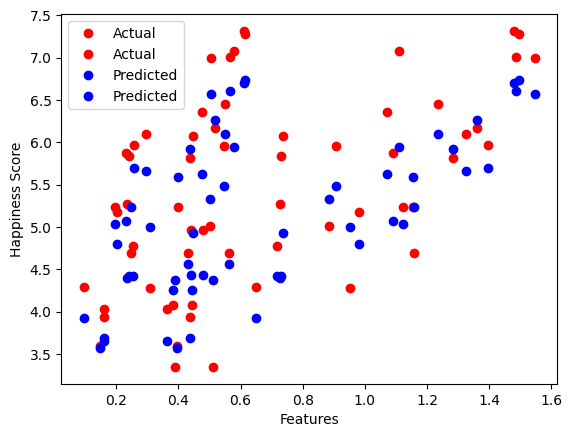

In [15]:
# importing dataset 

dataset = pd.read_csv('2017.csv') 

#splitting the data 

x = dataset.sample(frac=0.8)
y = dataset.drop(x.index)

feature1 = 'Economy..GDP.per.Capita.'
feature2 = 'Freedom'
target = 'Happiness.Score'

X_train = x[[feature1, feature2]].values
y_train = x[target].values

X_test = y[[feature1, feature2]].values
y_test = y[target].values

#train
model = LinearRegression(X_train, y_train, learning_rate=0.5)
weights, bias = model.fit()
print("Weights:", weights)
print("Bias:", bias)
#predict
y_pred = model.predict(X_test)

#plotting the results 

plt.plot(X_test, y_test, 'ro', label='Actual')
plt.plot(X_test, y_pred, 'bo', label='Predicted')
plt.xlabel('Features')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


